### 1. Load Data

In [1]:
from sklearn.datasets import load_boston
data = load_boston()
data.DESCR.split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [2]:
import numpy as np
import pandas as pd

In [3]:
print (data["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 2. Prepare the Data

In [4]:
df_boston_features = pd.DataFrame(data.data)
df_boston_target = pd.DataFrame(data.target)

In [5]:
df_boston_features.columns = list(data.feature_names)

In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
df_boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [127]:
data = df_boston_features.copy()
data["MEDV"] = df_boston_target.copy()

In [128]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df_boston_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
df_boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df_boston_features.shape

(506, 13)

In [11]:
df_boston_target.shape

(506, 1)

In [12]:
df_boston_target.columns = ["Price"]

In [13]:
df_boston_features.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [14]:
import seaborn as sns

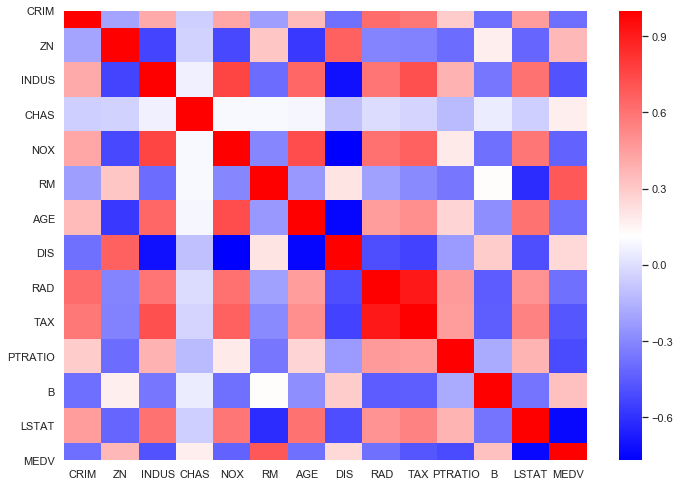

In [129]:
sns.heatmap(data.corr(),cmap="bwr");

In [16]:
df_boston_features.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

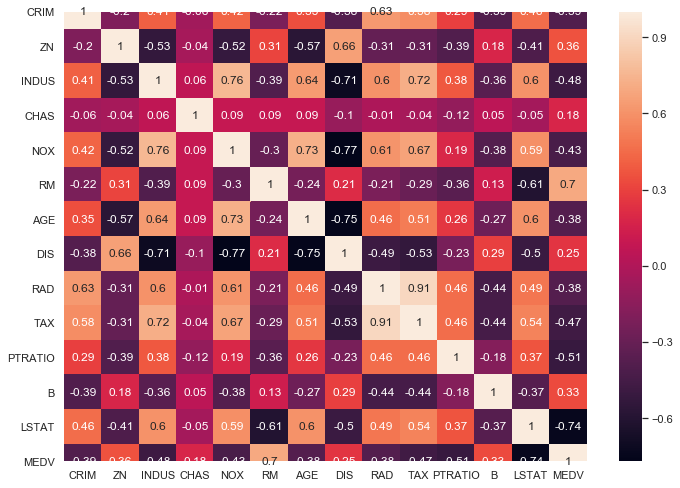

In [131]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

In [17]:
df_boston_target.isna().any()

Price    False
dtype: bool

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df_boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [20]:
df_boston_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


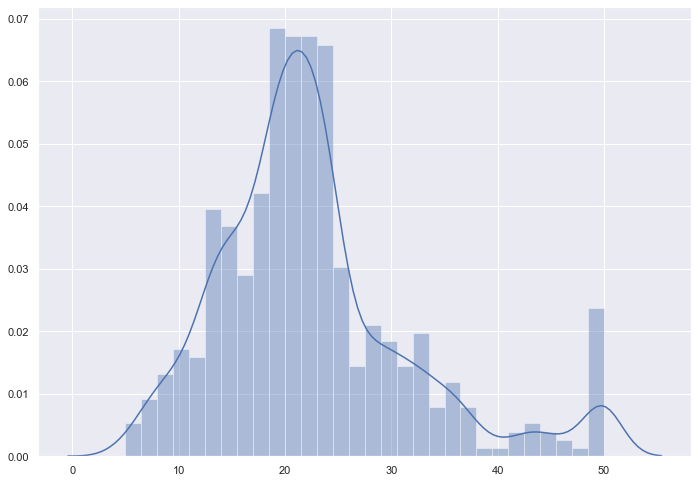

In [122]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data.target, bins=30)
plt.show()
   

**Need Feature Engineering to unify the scales**

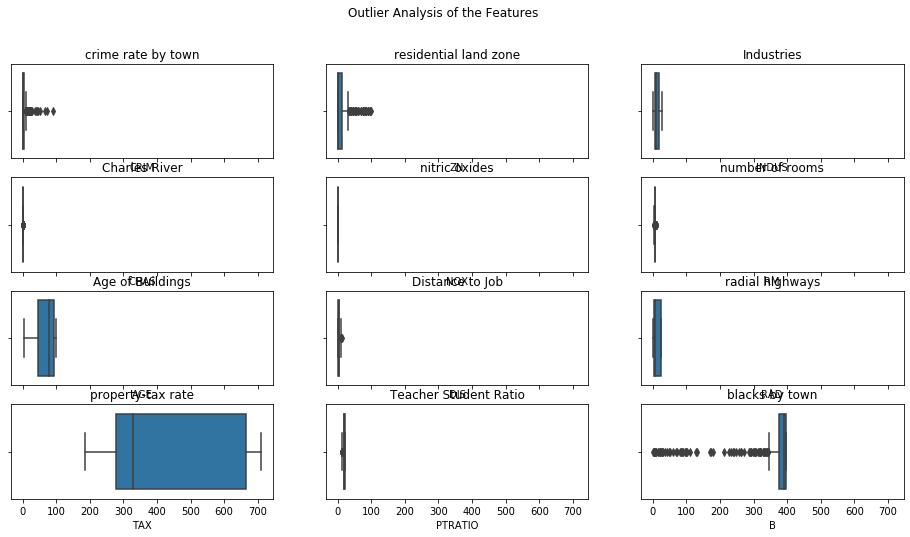

In [21]:
fig, axes = plt.subplots(4,3,sharex=True, figsize=(16,8))
fig.suptitle('Outlier Analysis of the Features');
axes[0,0].set_title("crime rate by town")
sns.boxplot(df_boston_features["CRIM"],ax = axes[0,0]);

axes[0,1].set_title("residential land zone")
sns.boxplot(df_boston_features["ZN"],ax = axes[0,1])

axes[0,2].set_title("Industries")
sns.boxplot(df_boston_features["INDUS"],ax = axes[0,2] );

axes[1,0].set_title("Charles River")
sns.boxplot(df_boston_features["CHAS"],ax = axes[1,0] ); 

axes[1,1].set_title("nitric oxides")
sns.boxplot(df_boston_features["NOX"],ax = axes[1,1] );

axes[1,2].set_title("number of rooms")
sns.boxplot(df_boston_features["RM"],ax = axes[1,2] );

axes[2,0].set_title("Age of Buildings")
sns.boxplot(df_boston_features["AGE"],ax = axes[2,0] );

axes[2,1].set_title("Distance to Job")
sns.boxplot(df_boston_features["DIS"],ax = axes[2,1] );

axes[2,2].set_title("radial highways")
sns.boxplot(df_boston_features["RAD"],ax = axes[2,2] );

axes[3,0].set_title("property-tax rate")
sns.boxplot(df_boston_features["TAX"],ax = axes[3,0] );

axes[3,1].set_title("Teacher Student Ratio")
sns.boxplot(df_boston_features["PTRATIO"],ax = axes[3,1] );

axes[3,2].set_title("blacks by town")
sns.boxplot(df_boston_features["B"],ax = axes[3,2] );


In [138]:
X = data[["RM","LSTAT"]]
X.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [139]:
type(X)

pandas.core.frame.DataFrame

### 3. Split the Data 

In [22]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test,y_train,y_test = train_test_split(X,df_boston_target,test_size = 0.25)

In [141]:
X.columns

Index(['RM', 'LSTAT'], dtype='object')

In [142]:
print("Train Feature Size ",X_train.shape)
print("Train Target Size ",y_train.shape)
print("Test Feature Size ",X_test.shape)
print("Test Target Size ",y_test.shape)

Train Feature Size  (379, 2)
Train Target Size  (379, 1)
Test Feature Size  (127, 2)
Test Target Size  (127, 1)


### 4. Train the Model

In [143]:
from sklearn.linear_model import LinearRegression 

In [144]:
myModel = LinearRegression()

In [145]:
myModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5. Validate Model

In [146]:
from sklearn.metrics import mean_absolute_error

In [147]:
y_pred = myModel.predict(X_test)

In [148]:
mean_absolute_error(y_test,y_pred)

4.193399221845947

In [149]:
print("The Intercept of the model is {}".format(myModel.intercept_))

The Intercept of the model is [-2.07150054]


In [150]:
print("The Coefficients of the model are {}".format(myModel.coef_))

The Coefficients of the model are [[ 5.23441452 -0.67799587]]


In [156]:
myModel.coef_[0]

array([ 5.23441452, -0.67799587])

In [158]:
coeffdf=pd.DataFrame(myModel.coef_[0],index=X.columns)

In [159]:
coeffdf.columns =["Betas"]

In [160]:
coeffdf.head()

,Betas
RM,5.234415
LSTAT,-0.677996


In [161]:
coeffdf.sort_values(['Betas'],ascending=False)

,Betas
RM,5.234415
LSTAT,-0.677996


#### Inferences
* There is 3108 dollars increase for every room in Boston
* For Every increase in parts per 10 million of Nitrous Oxide in the Atmosphere, House Price drops by 16k dollars
* For each Unit Increase in Pupil teacher ratio, the price drops by 820 dollars
* For Every mile distant from the main industry locations, the price drops by 1483 dollars

### 6. Visualize the Model

In [162]:
import matplotlib.pyplot as plt

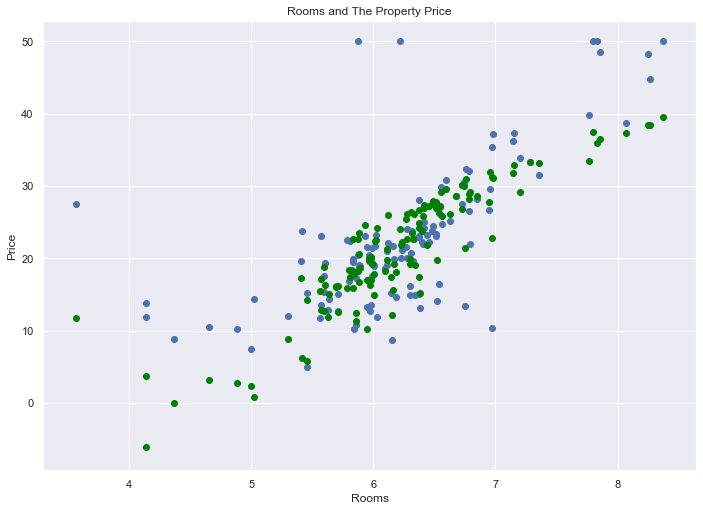

In [165]:
plt.scatter(X_test["RM"],y_test);
plt.scatter(X_test["RM"], y_pred, color = "green")
plt.title("Rooms and The Property Price")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show();

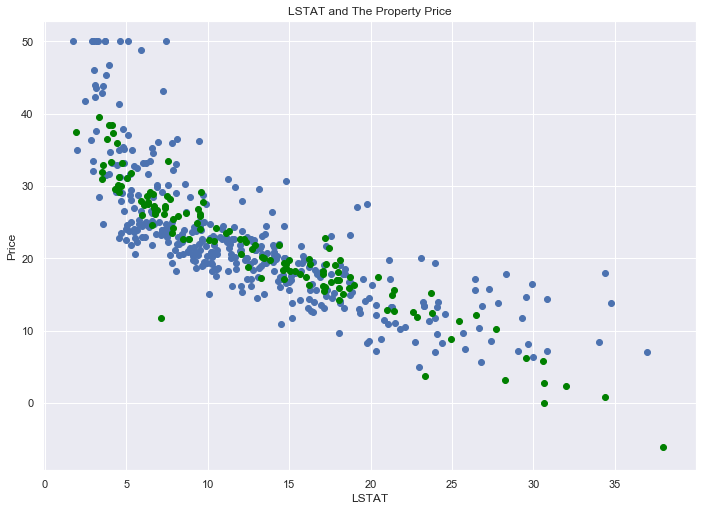

In [166]:
plt.scatter(X_train["LSTAT"],y_train);
plt.scatter(X_test["LSTAT"], y_pred, color = "green")
plt.title("LSTAT and The Property Price")
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.show();

KeyError: 'RAD'